In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Exercise 3
## Introduction
Solving differential equations is a common problem in mathematics. In this report we will look at a boundary value problem (BVP) and solve it numerically. The problem we will look at is a second order differential equation with a first order derivative term. We will first set up a theorem for the problem, and then try to prove it by looking at the method to set up a scheme. We will also look at the method numerically and do an error analysis of the method. Lastly we will look at a case where our assumptions are not met and see how the method behaves in this case.

The problem we will have a look at is as follows:
$$
\begin{align}
-\mu u_{xx} +b u_x = f(x),0 < x < 1,  \\
  u(0) = g_0, u(1) = g_1, \\
 m = 0,1,... M, h = \frac{1}{M}, \mu > 0.

\end{align}
$$

Where (2) are the boundary conditions and (1) is the equation we will look at.

### Theorem: 
If we have a boundary value problem on the form of (1) and assume that $f(x)$ is continous and that $g_0$, $g_1$, $b$ and $\mu$ are constants, where $\mu > 0$. We can numerically solve the problem with a second order central difference approximation and keep the order of convergence of the scheme.

## Method

Since we have a BVP we need to divide the domain into two, the boundary and the inner gridpoints, we can interpret them as:
$$
\begin{align}
L u = f,&  x \in \Omega, \\
B u = g,&x \in \partial \Omega.
\end{align}
$$

This gives that $x_0$ and $x_M$ holds the values of $g_0$ and $g_1$ respectivly. More on $L$ is a linear differential operator and $B$ is the operator for the boundaries.

The domain $\Omega$ will be a grid with uniform stepsize $h$, where $x_m \in \Omega$ and the conditions of (3) is satisfied as well as $ x_m = m h$ now sufies.

For the difference approximations we use the central difference approximation for $u_x$ and the central difference approximation of the second derivate $u_{xx}$, these approximations gives us:

$$
\begin{align*}
&u_{xx} \approx \frac{u_{m-1}-2 u_{m} + u_{m+1}}{h^2} \\
&u_x \approx \frac{u_{m+1}- u_{m-1}}{2h}
\end{align*}
$$

This leads to equation (1) looking like:
$$
\begin{align*}
&- \mu \frac{u_{m-1}-2 u_m + u_{m+1}}{h^2} + b  \frac{u_{m+1}- u_{m-1}}{2h} = f(x_m), \\
\end{align*}
$$

and now we multiply by $h^2$ to simplify and get:

$$
- \mu\left( {u_{m-1}-2 u_m + u_{m+1}} \right)+ \frac{b h}{2} \left( u_{m+1}- u_{m-1}\right) = h^2 f(x_m).
$$
Now we combine the different approximations of $u$ with their respective coefficants:
$$
-u_{m-1} \left( \frac{bh}{2} + \mu \right) + 2 \mu u_m + u_{m+1} \left(\frac{bh}{2}- \mu \right) = h^2 f(x_m),
$$
and now using this to find a matrix $\bold{A}$ that satisfies $\bold{A} U = h^2 f(x)$ we find 
$$
A = 
\begin{bmatrix}
2 \mu & \frac{bh}{2}- \mu & 0 & ... & 0 \\
- \left(\frac{bh}{2} + \mu\right) & 2 \mu & \frac{bh}{2}- \mu &  & \vdots \\
0 & \ddots & \ddots & \ddots &  0\\
 \vdots&  & \ddots & \ddots & \frac{bh}{2}- \mu \\ 
0 & ... &0 & - \left(\frac{bh}{2} + \mu\right) & 2 \mu
\end{bmatrix}
$$

With the boundary problems we get that $\bold{f} = (f_1 - (\frac{bh}{2}-\mu)g_0,f_2,  ...f_{M-2}, f_{M-1}+(\frac{bh}{2}-\mu)g_1)^T$ where $f_m = f(x_m)$ and $U = (u_1, u_2, ... u_{M-1}, u_M)^T$

## Testing the method

To test the method we need a problem we now the solution of, as well as boundary conditions. We will have a look at the following:
$$
f(x) = - \pi^2 sin(\pi x) + \pi cos(\pi x), \\
\text{with } \mu = 1, b=1, g_0 = g_1 = 0. 
$$
This problem has the exact solution $U = sin(\pi x)$ which is plotted as red in the following plot.

Here the implementation of the matrix $A$ has taken some insperation from the 1 dimensional poisson equation jupyter notebook from week 2 in the course TMA4212. 

$np.linalg.solve$ is used to compute $U $ from the equation $A U = h^2 f(x)$

In [12]:
def BVP_solver(g_0, g_1, func, mu, b, M):
    h = 1/M
    x = np.linspace(0,1, M+1)

    e = np.ones(M-1)        # array [1,1,...,1] of length N
    matrix = -(b*h/2 + mu)*np.diag(e[1:],-1)+2*mu*np.diag(e)+(b*h/2-mu)*np.diag(e[1:],1) #creates the tridiagonal matrix we computed above
    F = h**2 * func(x[1:-1], mu, b) #takes the inner gridpoints and uses them in the function
    #Takes the difference from the function and the BC
    F[0] -= -g_0*(b*h/2 - mu)
    F[-1] -= g_1*(b*h/2 - mu)
    
    U = np.zeros(M+1)
    U[1:-1] = np.linalg.solve(matrix, F) #computes the approximation
    U[0], U[-1] = g_0, g_1 #sets BC on U

    return U, x

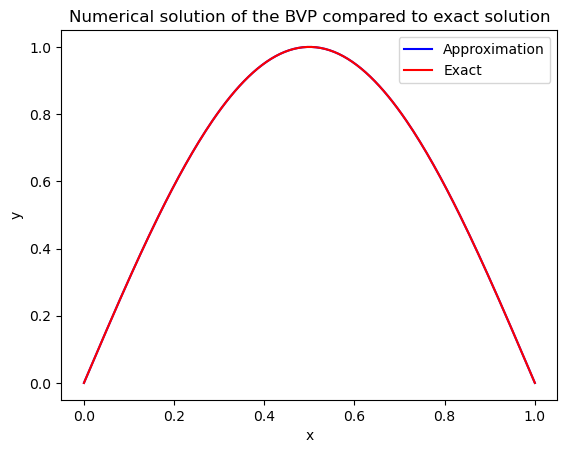

In [13]:
#list of variables
g_0 = 0
g_1 = 0
mu = 1
b = 1
M = 200

pi = np.pi
def f(x, mu = mu, b = b):
    return pi**2 * np.sin(pi *x) + pi * np.cos(pi * x)
def exact(x):
    return np.sin(pi * x)

U, x = BVP_solver(g_0, g_1 , f, mu, b, M) #using the solver
plt.plot(x, U,color =  'b', label = f"Approximation")
plt.plot(x, exact(x), color = 'r', label = "Exact")
plt.title("Numerical solution of the BVP compared to exact solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

This plot shows that the numerical solution is very close to the exact solution, and the method seems to be working as intended for this test problem.

## Error analysis

### Local truncation error

We want to find the truncation error first, we do this by taylor expanding $u_{m-1}$ and $u_{m+1}$ and subsituting them back into our scheme, it is a beautiful method to cancel out terms.
The taylor expantions of $u_{m-1}$ and $u_{m+1}$ are respectivly:
$$
\begin{align}
u_{m-1} = u(x_m - h) = u(x_m) - h u_x(x_m) + \frac{h^2}{2} u_{xx}(x_m) - \frac{h^3}{6} u_{xxx}(x_m) + \frac{h^4}{24} u_{xxxx}(x_m) + O(h^5), \\
u_{m+1} = u(x_m + h) = u(x_m) + h u_x(x_m) + \frac{h^2}{2} u_{xx}(x_m) + \frac{h^3}{6} u_{xxx}(x_m) + \frac{h^4}{24} u_{xxxx}(x_m) + O(h^5).
\end{align}
$$

We want to use these taylor expantions together with our scheme to find the truncation error, we do this by inserting the taylor expantions into the scheme and then simplify the terms. The scheme is:
$$
-u_{m-1} \left( \frac{bh}{2} + \mu \right) + 2 \mu u_m + u_{m+1} \left(\frac{bh}{2}- \mu \right) = h^2 f(x_m),
$$

and now we insert the taylor expantions and simplify:
$$
\begin{align*}
\left( -u_m + h u_x(x_m) - \frac{h^2}{2} u_{xx}(x_m) + \frac{h^3}{6} u_{xxx}(x_m) - \frac{h^4}{24} u_{xxxx}(x_m) + O(h^5) \right) \left( \frac{bh}{2} + \mu \right) + 2 \mu u_m + \\
\left( u_m + h u_x(x_m) + \frac{h^2}{2} u_{xx}(x_m) + \frac{h^3}{6} u_{xxx}(x_m) + \frac{h^4}{24} u_{xxxx}(x_m) + O(h^5) \right) \left( \frac{bh}{2} - \mu \right) = h^2 f(x_m).
\end{align*}
$$
now we simplify the terms and get:
$$
\begin{align*}
u_m \left(-(\frac{bh}{2} + \mu) + 2 \mu + (\frac{bh}{2} - \mu) \right) + \\
h u_x(x_m) \left( (\frac{bh}{2} + \mu) + (\frac{bh}{2} - \mu) \right) + \\
\frac{h^2}{2} u_{xx}(x_m) \left( -(\frac{bh}{2} + \mu) + (\frac{bh}{2} - \mu) \right) + \\
\frac{h^3}{6} u_{xxx}(x_m) \left( (\frac{bh}{2} + \mu) + (\frac{bh}{2} - \mu) \right) + \\
\frac{h^4}{24} u_{xxxx}(x_m) \left( -(\frac{bh}{2} + \mu) + (\frac{bh}{2} - \mu) \right)+ \\
O(h^5) = h^2 f(x_m).
\end{align*}
$$
This mess of an equation can be simplified to the pretty:
$$
\begin{align*}
bh^2 u_x(x_m) - \mu h^2 u_{xx}(x_m) +  \frac{b h^4}{6} u_{xxx}(x_m) - \frac{\mu h^4}{12} u_{xxxx}(x_m) + O(h^5) =& h^2 f(x_m). \text{  we divide by } h^2\\
- \mu u_{xx} + b u_x +  \frac{b h^2}{6} u_{xxx} - \frac{\mu h^2}{12} u_{xxxx} + O(h^3) =& f(x_m).
\end{align*}
$$

This gives us the truncation error of the scheme if we susbract the BVP , and we can see that the error is of order $O(h^2)$.
$$
\tau_m = \frac{b h^2}{6} u_{xxx}(x_m) - \frac{\mu h^2}{12} u_{xxxx}(x_m). \\
|\tau_m| = |\frac{b h^2}{6} u_{xxx}(x_m) - \frac{\mu h^2}{12} u_{xxxx}(x_m)| \\
\leq h^2 \left( \frac{1}{6} |b u_{xxx}(x_m)| - \frac{\mu}{12} |u_{xxxx}(x_m)| \right) \\
= C h^2.
$$

We easily see that the local truncation error goes towards zero as $h$ goes towards zero, and using the triangle inequality and setting $C = \frac{1}{6} |b u_{xxx}(x_m)| - \frac{\mu}{12} |u_{xxxx}(x_m)|$ we can see that the local truncation error is of order 2.


### Stability
To check the stability of the scheme we first check for strictly diagonal dominance, this is done by checking if the absolute value of the diagonal element is greater than the sum of the absolute values of the other elements in the row. We set up the equation, and ignore the boundary conditions since they will be diagonally dominant if the rest of the scheme is:
$$ 
\begin{align*}
|2 \mu| & > |-(\frac{bh}{2}+ \mu)| + |\frac{bh}{2}- \mu |, \\

2 \mu &> |(\frac{bh}{2}+ \mu)| + |\frac{bh}{2}- \mu | \geq |\frac{bh}{2}+ \mu+ \frac{bh}{2}- \mu| = |bh|, \\
2 \mu &>|bh|, \implies h \leq \frac{2 \mu}{|b|}\\
\end{align*}
$$
Here we use the triangle inequality  as well as using |-a| = |a|, and get a bound on $h$ such that it is strictly diagonally dominant. Since the scheme is diagonally dominant and the off diagonal elements are negative, we have that the scheme is stable. From our condition that $h \leq \frac{2 \mu}{|b|}$ we have the off diagonal elements are negative. This comes from the theorem M-Matrix stability criterion.

From Lax equivalence theorem we know that if the scheme is consistent and stable, then it is convergent. The order of convergence is the same as the order of consistency in this case, thus we have that the scheme is of order 2. Thus it holds that $|e_m| < \tilde{C} h^2$ 

## Global error analysis
We need to shor that the global error satisfies $L_h e_m = \tau_m$ for all $m = 1,2,...,M-1$. We have already shown that the local truncation error is of order 2, and we have that the global error is of the same order. 
$$
\begin{align*}
L_h e_m &= L_h \left(u_m - U_m\right) = L_h u_m - L_h U_m = f(x_m)- f(x_m) + \tau_m = \tau_m \\
\end{align*}
$$ 
And we see that from using equation (1) from the method section with both the estimate and exact solution we get that the global error satisfies $L_h e_m = \tau_m$ for all $m = 1,2,...,M-1$.

Moving onwards we will apply the discrete maximum principle to find an upper bound for the global error. The discrete maximum principle states that the maximum of the solution is bounded by the maximum of the boundary conditions. We introduce the variable $v_m = \phi_ m \pm e_m$ where $L_h v_m \leq 0$ and $\phi_m$ is a test function. We choose $\phi_m = \frac{D}{2} x(1-x)$ such that the boundary conditions are suffied. the derivatives of $\phi_m$ are:
$$
\begin{align*}
\phi_x &= \frac{D }{2}(1-2x) \\
\phi_{xx} &= -D \\
\end{align*}
$$
We want to calculate the maximum value of $\phi_m$ and we do that by setting the derivative equal to zero and solve for $x$, we get that $max (\phi_m )=\frac{D}{8}$
We also have the equality $L_h \phi_m = L \phi_m$ which lead to:
$$
\begin{align*}
L_h v_m &= L_h \phi_m \pm L_h e_m = L \phi_m \pm \tau_m = \\
&= -\mu \phi_{xx} + b \phi_x \pm \tau_m = -\mu (-D) + b \frac{D}{2}(1-2x) \pm \tau_m  \\
&= D \mu + b D (1-2x) \pm \tau_m \leq 0.
\end{align*}
$$
We can now solve for $D$ and get that: 
$$
\begin{align*}
D (\mu + b (\frac{1}{2} - x)) \leq \mp \tau_m. \\
\end{align*}
$$
We choose $\pm$ to be a $-$, leading  the $\mp$ to be $+$, also we need $\mu + \frac{b}{2} > 0$  to satisfy the inequality. which sets some bound on $b$. 
$$
D (\mu + b (\frac{1}{2} - x)) \leq - \tau_m. \text{ multiply with -1}\\
- D (\mu + b (\frac{1}{2} - x)) \geq \tau_m. \\
max(-D (\mu + b (\frac{1}{2} - x))) \geq max(\tau_m) \\
D (\mu + \frac{b}{2}) \geq max(\tau_m) \\
D \geq \frac{max(\tau_m)}{\mu + \frac{b}{2}}.
$$
This together with the maximum value of $\phi_m$ gives us the upper bound for the global error, since $max (v_m) = max(\phi_m \pm e_m) = max(0, v_0, v_1) = 0$ thus from our assumptions we have that 
$$
max(e_m) \leq max(\phi_m) = \frac{D}{8} \leq \frac{max(\tau_m)}{8(\mu+\frac{b}{2})}.
$$
This gives us the upper bound for the global error using the discrete maximum principle.

## Verifying the numerical results
We will now verify the numerical results by solving the BVP problem for different values of $h$ which corresponds to changing $M$.

We need to compute $||e_m||_{\infty}$ to find the excact error, we do this by computing $||e_m||_{\infty} = max(|e_m| \leq \frac{max(\tau_m)}{8(\mu+\frac{b}{2})})$ for all $m = 1,2,...,M-1$. We are left with needing to compute 
$$
\begin{align*}
max(\tau_m) = max(|\frac{b h^2}{6} u_{xxx}(x_m) - \frac{\mu h^2}{12} u_{xxxx}(x_m)|) \\
= max(\frac{-bh^2 \pi^3 sin(\pi x_m)}{6}  + \frac{\mu h^2 \pi^4 cos(\pi x_m)}{12}) = \frac{\mu h^2 \pi^4 }{12}
\end{align*}
$$
We are left with this since $x$ is in the interval $[0,1]$ and we have that $sin(\pi x) = 0$ and $cos(\pi x) = 1$ for $x = 0$, and since the sinus part is negative we choose $x = 0$, thus for our solution:
$$
||e_m||_{\infty} \leq \frac{\mu h^2 \pi^4 }{96(\mu+\frac{b}{2})} = \tilde{C}h^2.
$$

In [14]:
def convergence(g_0, g_1, f, mu, b, u_exact, solver=BVP_solver): 
    P = 8
    H = np.zeros(P)
    E = np.zeros(P)
    M = 10
    for p in range(P):               
        U, x = solver(g_0, g_1, f, mu, b, M)    #this uses the BVP_solver we have implemented above
        Eh = u_exact(x)-U                       #Vector with the errors
        E[p] = np.max(np.abs(Eh))               #Max norm of error
        H[p] = 1/M                              # Step size
        M = 2*M                                 # Changing the stepsize
    order = np.polyfit(np.log10(H),np.log10(E),1)[0]       # Linear regression on error values over all refinements
    return H, E, order

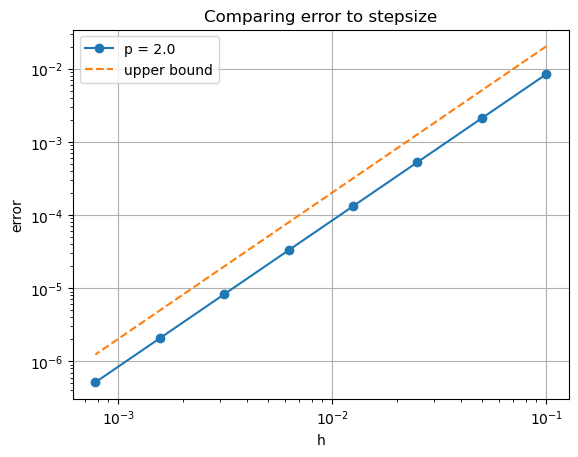

In [15]:
H, E, p = convergence(g_0, g_1 , f, mu, b, exact)
def plot(H, E, p):
    plt.loglog(H,E,'o-', label=f'p = {round(p,2)}')
    plt.loglog(H,((H**2)*mu*(np.pi**4))/(96*(mu-b/2)),'--',label='upper bound') #compares to maximum error computed above
    plt.grid(True)
    plt.xlabel('h')
    plt.ylabel('error')
    plt.title('Comparing error to stepsize')
    plt.legend();
    plt.show()
plot(H,E, p)

The plot above shows that the numerical estimates follows the theoretical upper bound for the error, and we can see that the error is of order $O(h^2)$. The plot also shows that the error decreases as $h$ decreases, which is expected.


## Complications with the method
We will now look at a test example that will not suffice the assumptions we have made in this report, we will have a look at the following problem:
$$
f(x) = e^{-x^2} \left(- \mu 4 x^3+2 b x^2-6 \mu x + b \right), \\
\text{with exact solution } U = x e^{-x^2}, \text{ and } g_0 = g_1 = 0.
$$

We now look at the condition $h \leq \frac{2 \mu}{|b|}$, and choose a value of $b$ such that this does not hold.

In the example below we look at one situation where this criteria is not met, and compare it with one where it is met.


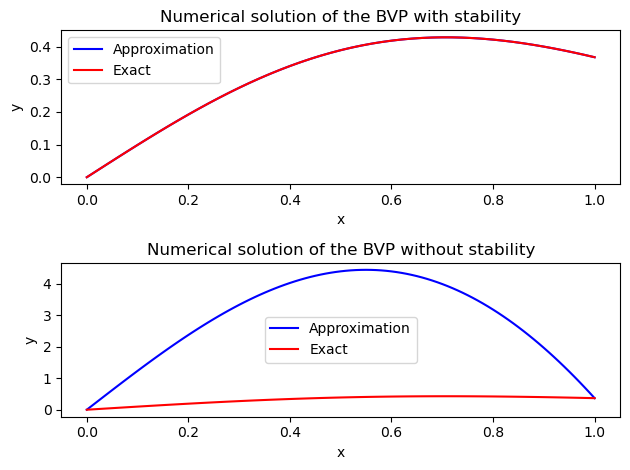

In [7]:
def g_exact(x, mu = mu, b = b):
    return x*np.e**(-x**2)

def g(x, mu = mu, b = b):
    return np.e**(-x**2) * (-mu *4 *x - 2*b*x**2+mu*x*mu + b)

g_0 = 0
g_1 = 1/np.e
M = 100

b_stable = 1000
mu_stable = 0.01
U_stable, x = BVP_solver(g_0, g_1, g, mu_stable, b_stable, M)

fig, axs = plt.subplots(2)

axs[0].plot(x, U_stable,color =  'b', label = f"Approximation")
axs[0].plot(x, g_exact(x), color = 'r', label = "Exact")
axs[0].set_title("Numerical solution of the BVP with stability")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()


b_unstable = 0.001
mu_unstable = 100

U_unstable, x = BVP_solver(g_0, g_1, g, mu_unstable, b_unstable, M)

axs[1].plot(x, U_unstable,color =  'b', label = f"Approximation")
axs[1].plot(x, g_exact(x), color = 'r', label = "Exact")
axs[1].set_title("Numerical solution of the BVP without stability")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend()
plt.tight_layout()
plt.show()

In the plot above we clearly see that without the stability requirement we dont see the solution converging, on the other hand the one where the stability is met, we also see a bad approximation. But its clear that without stability the solution does not approximate anything

In [8]:
H, E, p = convergence(g_0, g_1, g, mu_stable, b_stable, g_exact)
print(f'The mean error of the stable example: {np.mean(E)}')    

H, E, p = convergence(g_0, g_1, g, mu_unstable, b_unstable, g_exact)
print(f'The mean error of the unstable example: {np.mean(E)}') 

The mean error of the stable example: 0.07983303016582316
The mean error of the unstable example: 4.042518105371039



## Conclusion
We started off with a boundary value problem and derived a scheme to solve it numerically. We showed that the local truncation error is of order 2, and using the Lax equivalence theorem we also showed that the scheme is convergent of order 2. 

We solved the equation $-\mu u_{xx} + b u_x = f(x)$ numerically with test functions and boundary conditions being $g_0 = g_1 = 0$, and $f(x) = - \pi^2 sin(\pi x) + \pi cos(\pi x)$, with $\mu = 1$ and $b = 1$. Later we showed that our theoretical upper bound for the error was correct by comparing it to the numerical results, we found the global errors upper bound using the discrete maximum principle.

We also had a look at what happened if the stability requirement was not met, and we saw that the solution did not converge. Thus the assumptions that were made in this report are somewhat correct